In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from collections import defaultdict
import random
import math
import numpy as np


class QLearningAgent:
    def __init__(self, alpha, epsilon, discount, get_legal_actions, qvalues=defaultdict(lambda: defaultdict(lambda: 0))):

        self.get_legal_actions = get_legal_actions
        self._qvalues = qvalues
        self.alpha = alpha
        self.epsilon = epsilon
        self.discount = discount

    def get_qvalue(self, state, action):
        return self._qvalues[state][action]

    def set_qvalue(self, state, action, value):
        self._qvalues[state][action] = value


    def get_value(self, state):

        possible_actions = self.get_legal_actions
        if len(possible_actions) == 0:
            return 0.0

        possible_values = [self.get_qvalue(state, action) for action in possible_actions]
        value = np.max(possible_values)
        return value

    def update(self, state, action, reward, next_state):
        """
           Q(s,a) := (1 - alpha) * Q(s,a) + alpha * (r + gamma * V(s'))
        """

        gamma = self.discount
        learning_rate = self.alpha
        
        q_value = (1-learning_rate) * self.get_qvalue(state, action) + \
            learning_rate * (reward + gamma * self.get_value(next_state))
        self.set_qvalue(state, action, q_value)

    def get_best_action(self, state):

        possible_actions = self.get_legal_actions

        if len(possible_actions) == 0:
            return None

        possible_q_values = [self.get_qvalue(state, action) for action in possible_actions]
        index = np.argmax(possible_q_values)
        best_action = possible_actions[index]
        return best_action

    def get_action(self, state):

        possible_actions = self.get_legal_actions
        action = None

        if len(possible_actions) == 0:
            return None

        epsilon = self.epsilon

        if np.random.random() > self.epsilon:
            return self.get_best_action(state)
        return random.choice(possible_actions)

In [3]:
import gym
import gym_pygame
env = gym.make('Pong-PLE-v0')
n_actions = env.action_space.n
env.observation_space

pygame 2.1.0 (SDL 2.0.16, Python 3.9.2)
Hello from the pygame community. https://www.pygame.org/contribute.html
couldn't import doomish
Couldn't import doom


Box([-inf -inf -inf -inf -inf -inf -inf], [inf inf inf inf inf inf inf], (7,), float32)

In [4]:
env.action_space

Discrete(3)

In [5]:
agent = QLearningAgent(alpha=0.5, epsilon=0.99, discount=0.99, get_legal_actions=[i for i in range(n_actions)])


In [6]:
def get_state(s):
#     state = {
#             "player_y": s[0],
#             "player_velocity": s[1],
#             "cpu_y": s[2],
#             "ball_x": s[3],
#             "ball_y": s[4],
#             "ball_velocity_x": s[5],
#             "ball_velocity_y": s[6]
#         }
    return tuple([int(i) for i in [s[0], s[4]]])

def play_and_train(env, agent, t_max=10**4):
    
    total_reward = 0.0
    s = env.reset()
    for t in range(t_max):
        state = get_state(s)
        a = agent.get_action(state)
        env.render()
        next_s, r, done, _ = env.step(a)
        if state[0]-1 <= state[1] <= state[0]+1:
            r += 100
        agent.update(state, a, r, get_state(next_s))
        s = next_s
        total_reward += r
        if done:
            break

    return total_reward

1898


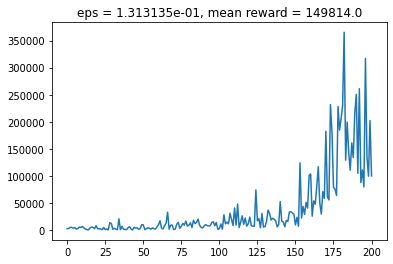

In [ ]:
from IPython.display import clear_output

rewards = []
for i in range(300):
    rewards.append(play_and_train(env, agent))
    agent.epsilon *= 0.99
    if i%100 == 0:
        clear_output(True)
        print(len(agent._qvalues))
        plt.title('eps = {:e}, mean reward = {:.1f}'.format(agent.epsilon, np.mean(rewards[-10:])))
        plt.plot(rewards)
        plt.show()